---
comments: true
layout: notebook
title: JWT Lesson 
description: JWT and Web Tokens
type: hacks
toc: true
courses: { csa: {week: 18} }
authors: Paaras, Varaprasad, Tanay, Rachit, Tanisha, Luna
---

# JWT Lesson

**Notebook Link**
wget https://raw.githubusercontent.com/The-Zesty-Rachits/CatalinaWarden/main/_notebooks/2023-12-19-JWTStudent.ipynb

**Backend Repository Link**
git clone https://github.com/The-Zesty-Rachits/zesty-backend-2.0-student.git

## Why do you need JWT 

Certain features in your application need to be restricted or require some sort of authentication mechanism. For example, a user information database  should only be accessed by administrators as it can contain sensitive information. Certain actions also need to be restricted such as deleting, updating, and creating new records. Additionally, different actions may be attributed to different roles. 

## What is JWT (AKA "JOT")

★ JWT stands for <mark>**JSON Web Token**</mark>. 

JWT allows information, in our case authentication roles, to be securely shared between an applications frontend and backend server as a JSON object . 

**Compact** = Because of its size, it can be sent through an URL, POST parameter, or inside an HTTP header. Additionally, due to its size its transmission is fast.
[will discuss payload later]

**Self-contained** = The payload contains all the required information about the user, to avoid querying the database more than once.

## What is a JWT Token

JWT is represented as JSON objects, these objects contain information about the user. JWT are supposed to be compact (should be easy to send between 2 parties). This is useful in the context of web development. When data needs to be moved efficiently.

[by looking in the JwtTokenUtil.java]

**JWT mainly has 3 different parts:**

1. **Header**

- usually contains the type of token and signing algo being used 
- determined by ‘SignitureAlgorithm’ which is used for signing the key it is using HMAC SHA algorithm and the ‘getSecertKey’ method to provide key for signing

In [ ]:
//header example
{
  "alg": "HS256",
  "typ": "JWT"
}

2. **Payload**

- contains claims (statements about user) and other data, 3 types of claims: <mark>**registered, public, private.**</mark> It is good to have predetermined claims: iss (issuer), exp (expiration time), sub (subject), aud (audience), ect. Here are some more examples of [predetermined claims](https://datatracker.ietf.org/doc/html/rfc7519#section-4.1).
- payload is made from the ‘doGenerateToken’ method here claims like orles are added ‘roles’ info is taken from ‘GrantedAuthority’ objects from ‘UserDetails

In [ ]:
//payload example
{
    //subject
    "sub": "1234567890",
    "name": "Tanisha Patel",
    "admin": true
}

3. **Signature** 

- to create signature part head and payload are combined and secret is used to sign it. Signature is used to verify sender of JWT to ensure message wasn’t changed along the way
- the signature is made from the <mark>**‘doGenerateToken’**</mark> method where the JWT is signed with <mark>**‘SectretKey’**</mark> from the ‘getSecretKey’ method

JWT are commonly used in authentication, when the user logs in and gets a JWT, sent to the request to authenticate said user. Servers can verify a token's authenticity by checking the signature, if valid then the server can trust the information in the token.

In [ ]:
//example using the HMAC SHA 256 algorithm
HMACSHA256(
    base64UrlEncode(header) + "." +
    base64UrlEncode(payload),
    secret)

<img width="519" alt="Screenshot 2023-12-13 at 4 12 49 PM" src="https://github.com/The-Zesty-Rachits/CatalinaWarden/assets/111661543/cb6f99fe-b879-47f5-9da2-b08964ca3b5f">

## Web Tokens

When a user logs in a <mark>**JSON Web Token**</mark> is returned. Tokens are basically credentials so they need to be protected

★ Should not keep tokens longer than required

★ Should not store data in [local storage](https://cheatsheetseries.owasp.org/cheatsheets/HTML5_Security_Cheat_Sheet.html#local-storage)

Whenever the user wants to access a protected route or resource, the user agent should send the JWT, typically in the Authorization header using the Bearer schema. The content of the header should look like the following:


In [ ]:
Authorization: Bearer <token>

★ if you send JWT tokens through HTTP headers, you should try to prevent them from getting too big. (some servers don't accept more than 8KB in headers)

Alternative solution >> Auth0 Fine-Grained Authorization.

Instead of adding all the details into a large JWT you can keep the tokens smaller and use Auth0 to check more detailed rules and premissions. Instead of having all the acess information in each request, check Autho0 to see if the user has the right permissions, only fetch the necessary details when required, reducing the data transfer overhead.



<img width="488" alt="Screenshot 2023-12-13 at 4 08 15 PM" src="https://github.com/The-Zesty-Rachits/CatalinaWarden/assets/111661543/5802fc5a-fbeb-4d01-99c4-cd6bce8575ef">

1.★ The application or client requests authorization to the authorization server. This is performed through one of the different authorization flows. For example, a typical OpenID Connect compliant web application will go through the /oauth/authorize endpoint using the authorization code flow.

2.★ When the authorization is granted, the authorization server returns an access token to the application.

3.★ The application uses the access token to access a protected resource (like an API).

Don't put secret information within token > with signed tokens all info contained within token is exposed to userer/other parties but they can' change it.


## Benefits of JWT 

Some benefits of <span style="color:blue">JSON Web Tokens (JWT)</span> over <span style="color:red">Simple Web Tokens (SWT) and Security Assertion Markup Language Tokens (SAML):</span>

★ **Asymmetric Signing:**

<span style="color:blue">**JWT**: Supports asymmetric signing using a public/private key pair, providing a more robust security model.</span>

<span style="color:red">**SWT**: Limited to symmetric signing with HMAC, which may have implications for key management and security.</span>

★ **Versatility in Key Usage:**

<span style="color:blue">**JWT**: Allows the use of various key types, including X.509 certificates, enhancing flexibility in key management strategies.</span>

<span style="color:red">**SWT**: Primarily relies on shared secrets for signing, limiting the range of available key types.</span>

★ **Ease of Implementation:**

<span style="color:blue">**JWT**: Typically considered easier to implement due to its simpler structure and support for common web development libraries.</span>

<span style="color:red">**SWT and SAML**: May involve more complex implementations, especially in the case of XML-based SAML tokens.</span>

★ **Compatibility with Modern Web Standards:**

<span style="color:blue">**JWT**: Aligns well with modern web development practices, RESTful APIs, and JSON-based communication, making it a natural fit for contemporary applications.</span>

<span style="color:red">**SWT and SAML**: May be perceived as more traditional or heavyweight, with SAML using XML, which could be less favorable in certain contexts.</span>

★ **Token Size and Efficiency:**

<span style="color:blue">**JWT**: Typically has a more compact size due to its JSON format, leading to more efficient transmission and reduced overhead.</span>

<span style="color:red">**SWT and SAML**: May have larger token sizes, especially in the case of XML-based SAML, potentially impacting network performance.</span>

★ **Community Adoption:**

<span style="color:blue">**JWT**: Enjoying widespread adoption in the developer community, with extensive support in libraries, frameworks, and platforms.</span>

<span style="color:red">**SWT and SAML**: While still used in various scenarios, they may not be as widely adopted or preferred in modern web development.</span>

★ **Standardization and Interoperability:**

<span style="color:blue">**JWT**: Benefits from standardized specifications, promoting interoperability between different systems and services.</span>

<span style="color:red">**SWT and SAML**: While standardized, may face challenges in terms of interoperability and compatibility in diverse environments.</span>

However, between these three (JWT, SWT, and SAML) depends on requirments of application, security concerns, and overall structure of system. [each one has special uses can suitable depending on the case]


## Anatomy of JWT Folder 

Open the cloned backend >>

src/main > spring_portfolio > mvc > jwt

**JwtApiController.java**

Maps the authentication token creation method to the “/create” endpoint. Validating email and password and if valid then generates the JWT token for credentials.

**JwtAuthenticationEntryPoint.java**

Implementing AuthenticationEntryPoint and overriding the commence function to specify what to do when a user is not authenticated, return unauthorized error.

**JwtRequestFilter.java**

Extend Spring Web Filter using OncePerRequestFiler class and overrides doFilterInternal function so requests sent to server are processed through function. Function then checks if JWT token is valid and sets Authentication to specify current user is authenticated.

**JwtTokenUtil.java**

Contains utilities/functions that are needed to generate JWT tokens and get information like email from JWT tokens to make sure JWT token is valid


## Unauthenticated User Redirect

In the context of JWT (JSON Web Tokens) in Java, the concept of unauthenticated user redirect typically involves handling situations where a user tries to access a protected resource without proper authentication. JWT is commonly used for authentication and authorization purposes in web applications.

Here's an explanation of how unauthenticated user redirect might be implemented in Java with JWT:

1. **Authentication Process:**
   - When a user tries to access a <mark>protected</mark> resource, they need to include a valid JWT token in their request.
   - The server verifies the JWT token's signature and checks its claims to ensure the user is authenticated.

2. **Handling Unauthenticated Users:**
   - If the user is not authenticated (i.e., they don't provide a valid JWT token or the token is expired), the server identifies them as an <mark>unauthenticated</mark> user.

3. **Redirect Mechanism:**
   - Instead of directly denying access, a common approach is to redirect the unauthenticated user to a login page or an authentication <mark>endpoint</mark>.

4. **Java Implementation:**
   - In Java, you might use a web framework like Spring Boot for building your application.
   - Spring Security is commonly used for handling authentication and authorization.

Here's a simplified example using Spring Security:

In [ ]:
@Configuration
@EnableWebSecurity
public class SecurityConfig extends WebSecurityConfigurerAdapter {

    @Override
    protected void configure(HttpSecurity http) throws Exception {
        http.authorizeRequests()
                .antMatchers("/protected-resource/**").authenticated() // authentication for "protected resources"
                .anyRequest().permitAll() // any request NOT to protected resources is allowed
                .and() 
            .formLogin()
                .loginPage("/login") // Redirect to the login page for unauthenticated users
                .permitAll() 
                .and()
            .logout()
                .permitAll();
    }

    // Other configurations, userDetailsService, etc.
}

   - In this example, <mark>/protected-resource/**</mark> is a placeholder for the path of your protected resource.
   - If an unauthenticated user tries to access this resource, they will be redirected to the login page ("/login" in this case).

1. **Login Controller:**
   - You would need to implement a controller for handling the login process and authentication.

In [ ]:
@Controller
public class LoginController {

    @GetMapping("/login")
    public String showLoginForm() {
        return "login"; // Render the login page
    }

    // Handle form submission and authentication here
}

   - The `showLoginForm` method renders the login page when an unauthenticated user is redirected.

## What Happens When you aren't Logged In

When a user is not logged in and tries to access a protected resource (e.g., `/person/authenticate` or `/human/authenticate`), they will be redirected to the login page (`/login`). This redirection is typically handled by the security configuration in your Spring application. In the provided code, the redirection is not explicitly shown, but it's assumed that there is a login page or endpoint where users are redirected for authentication.

In the `JwtAuthenticationEntryPoint` class, the `commence` method is called when an unauthenticated user tries to access a secured resource. It sends an unauthorized response (HTTP 401) with the message "Unauthorized."

### JwtAuthenticationEntryPoint.java

In [ ]:
@Component
public class JwtAuthenticationEntryPoint implements AuthenticationEntryPoint {

    @Override
    public void commence(HttpServletRequest request, HttpServletResponse response, AuthenticationException authException) throws IOException {

        // When an unauthenticated user tries to access a secured resource
        // Send an unauthorized response (HTTP 401) with the message "Unauthorized"
        response.sendError(HttpServletResponse.SC_UNAUTHORIZED, "Unauthorized");
    }
}

Explanation:

- The `JwtAuthenticationEntryPoint` class implements the `AuthenticationEntryPoint` interface.
- The `commence` method is invoked when an unauthenticated user attempts to access a secured resource.
- The method sends an HTTP 401 (Unauthorized) response to indicate that authentication is required.

This class is part of the authentication flow and handles the entry point for unauthenticated requests.

### JwtRequestFilter.java

**Popcorn Hack**: Think back to your mini-project. What kind of pages did you have that could've required login?
Use the JWT code given in the backend and show in the empty code cell below how you would implement it:

In [ ]:
// Code/Code/Code here!
@Controller
public class LoginController {
    
    @GetController("/login")
    public String login() {
        return "login"
    }

    @GetController("/cities")
    public String cities() {
        return "cities"
    }
}

In [ ]:
@Component
public class JwtRequestFilter extends OncePerRequestFilter {

    // ... (other autowired dependencies)

    @Override
    protected void doFilterInternal(HttpServletRequest request, HttpServletResponse response, FilterChain chain)
            throws ServletException, IOException {

        // Extract JWT token from the cookie in the request
        final Cookie[] cookies = request.getCookies();
        String username = null;
        String jwtToken = null;

        // Check if cookies are present in the request
        if (cookies != null) {
            for (Cookie cookie : cookies) {
                if (cookie.getName().equals("jwt")) {
                    jwtToken = cookie.getValue();
                }
            }

            // If a JWT token is found, attempt to validate and extract username
            if (jwtToken != null) {
                try {
                    username = jwtTokenUtil.getUsernameFromToken(jwtToken);
                } catch (IllegalArgumentException e) {
                    System.out.println("Unable to get JWT Token");
                } catch (ExpiredJwtException e) {
                    System.out.println("JWT Token has expired");
                } catch (Exception e) {
                    System.out.println("An error occurred");
                }
            }
        }

        // If no valid JWT token is found or an error occurs, the user remains unauthenticated

        // Continue with the filter chain
        chain.doFilter(request, response);
    }
}

Explanation:

- The `JwtRequestFilter` class extends `OncePerRequestFilter` and is responsible for processing JWT tokens in each request.
- In the `doFilterInternal` method, it extracts the JWT token from the cookie in the request.
- If no valid JWT token is found or an error occurs during extraction/validation, the user remains unauthenticated.
- The filter then continues with the filter chain, allowing other filters to process the request.

This class is crucial for validating and processing JWT tokens in each incoming request. If a valid token is present, it sets the user's authentication details in the security context. If not, the user remains unauthenticated.

## Live Demo

Take notes in your own words during the live demo as if you're explaining to someone else how a JWT program can be used.

Notes:

- You have to log in correctly to check who you are-you have the authority of user
- Can't do everything as a user (can't use all functionalities)
- To check who everyone is, you have to have authority of admin

# Hacks

- Finish popcorn hacks

- Using Canva, Draw.io, or any other graphics software of your choice, make a diagram that visually explains how user authentication works with JWT in Java.
- Take a screenshot of your backend repository being successfully tested with Postman.

- Create a basic API, and implement the JWT security features mentioned above. Bonus points for redirection to a login page to create a JWT token. 


## user authentication diagram


## Backend repository testing
![postman](/images/cities_test.png)
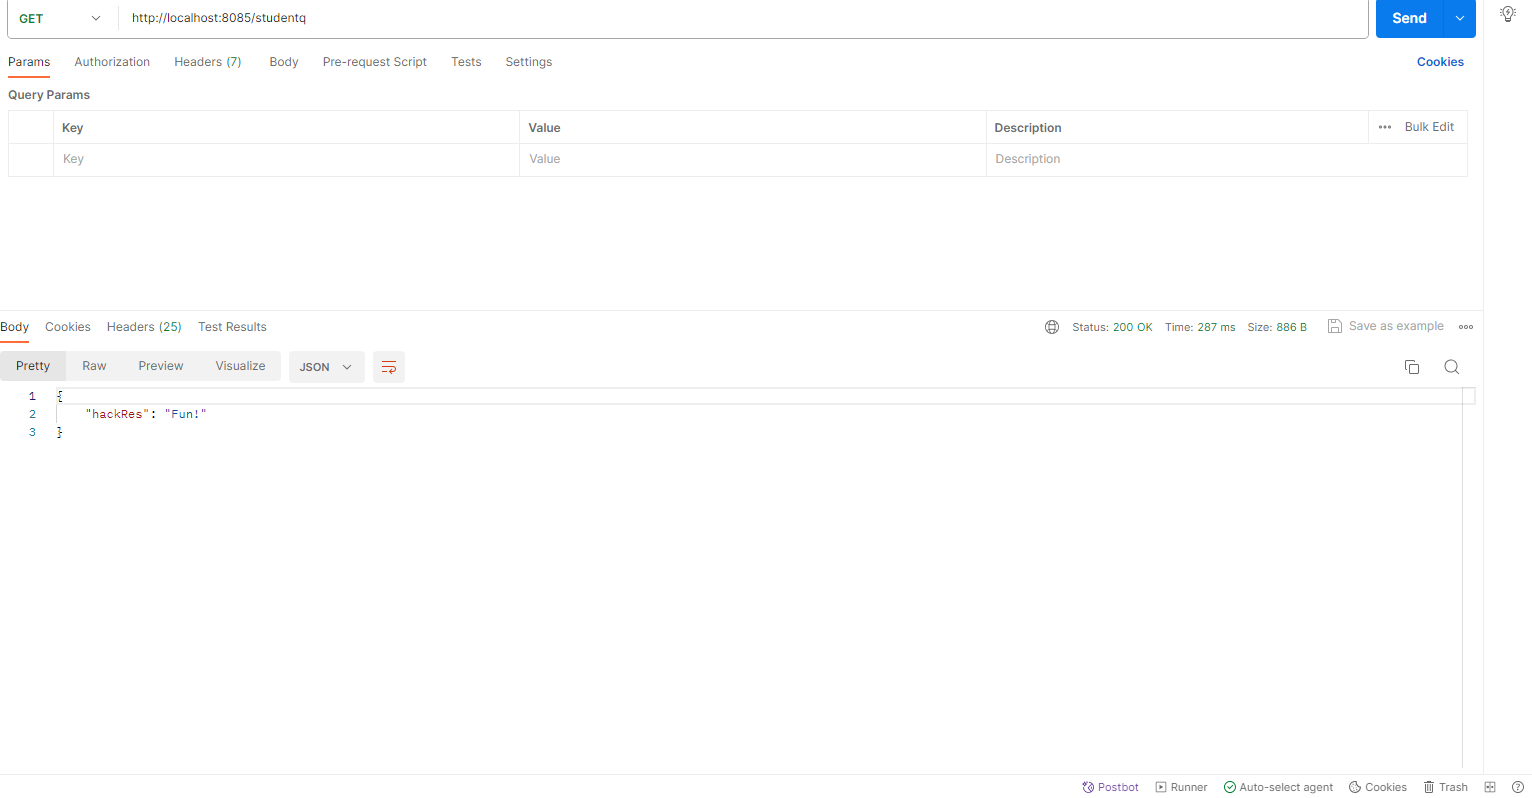

<!DOCTYPE HTML>

<html xmlns:layout="http://www.w3.org/1999/xhtml" xmlns:th="http://www.w3.org/1999/xhtml"
      layout:decorate="~{layouts/base}" lang="en">

<head>
    <title>Login for JWT Hacks</title>
</head>

<body>

    <th:block layout:fragment="body" th:remove="tag">

    <div>
    <div class="p-5 mb-4 bg-light text-dark rounded-3">
        <h1>Login</h1>
        <label for="email">Username:</label><br>
        <input type="text" id="username" name="username"><br>
        <label for="password">Password:</label><br>
        <input type="text" id="password" name="password"><br><br>
        <input type="submit" value="Login" onclick="login()">
        <p id="message"></p>
    </div>
</div>

<script>
    function login() {
        var email = document.getElementById('username').value;
        var password = document.getElementById('password').value;
        var data = {email:email, password:password};
        fetch("/authenticate", {method: 'POST', headers: {'Content-Type': 'application/json'}, body: JSON.stringify(data)}).then((data) => {
            if (data.status == 200) {
                window.location.replace("/hacksgo");
            } else if (data.status == 401) {
                document.getElementById('message').innerHTML = "not authorized"
            } else {
                document.getElementById('message').innerHTML = "Invalid email or password"
            }
        });
    }
    
</script>


</th:block>
</body>

<head>
    <title>Hacks</title>
</head>

<body>
    <span id="conga">congrats!</span>
    <button id="button1" style="height:50px;width:100px">Click for fun!</button>
    <script>
        document.getElementById("button1").onclick = function(){
            fetch("/studentq", {method: 'GET'})
            .then(response => response.json())
            .then((data) => {
                document.getElementById("conga").textContent=data.hackRes;
            });
        }
    </script>
</body>

In [ ]:
package com.nighthawk.spring_portfolio.hacks;

public class Hacks {
    public static String HackApi() {
        return "Fun!";
    }
}


In [ ]:
package com.nighthawk.spring_portfolio.hacks;

import org.springframework.http.ResponseEntity;
import org.springframework.stereotype.Controller;
import org.springframework.web.bind.annotation.GetMapping;

@Controller
public class HacksController {
    @GetMapping("/mylogin")
    public String login() {
        return "mylogin";
    }

    @GetMapping("/hacks")
    public String hacks() {
        return "mylogin";
    }

    @GetMapping("/hacksgo")
    public String hacksgo() {
        return "hacks";
    }

    @GetMapping("/studentq")
    public ResponseEntity<?> getHack() {
        String hackString = Hacks.HackApi();
        var response = new Object() {
            public final String hackRes = hackString;
        };
        return ResponseEntity.ok(response);

    }
}
